In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Random Forest dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

In [2]:
filepath = "../data/processed/rf_df.pkl"

In [3]:
df = pd.read_pickle(filepath)

In [4]:
df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_month,release_year,release_day,day_of_week,profit,profit_cat
0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,10,1995,30,0,343554033.0,1
1,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,12,1995,15,4,197797249.0,1
3,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,12,1995,22,4,65452156.0,1
5,60000000.0,17.924927,187436818.0,170.0,7.7,1886.0,12,1995,15,4,127436818.0,1
8,35000000.0,5.231580,64350171.0,106.0,5.5,174.0,12,1995,22,4,29350171.0,1


In [5]:
X = df.drop(columns=['profit_cat', 'profit', 'revenue'])
X.head()

,budget,popularity,runtime,vote_average,vote_count,release_month,release_year,release_day,day_of_week
0,30000000.0,21.946943,81.0,7.7,5415.0,10,1995,30,0
1,65000000.0,17.015539,104.0,6.9,2413.0,12,1995,15,4
3,16000000.0,3.859495,127.0,6.1,34.0,12,1995,22,4
5,60000000.0,17.924927,170.0,7.7,1886.0,12,1995,15,4
8,35000000.0,5.231580,106.0,5.5,174.0,12,1995,22,4


In [6]:
y = df.profit_cat
y.head()

0    1
1    1
3    1
5    1
8    1
Name: profit_cat, dtype: int64

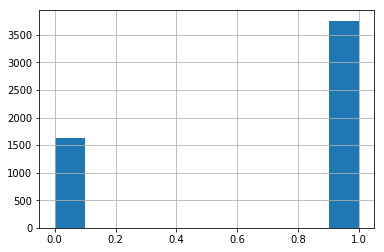

In [7]:
plt.figure()
df.profit_cat.hist()
plt.show()

In [8]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=12)

In [9]:
#Create forest classifier
forest_clf = RandomForestClassifier(class_weight='balanced', random_state=12)
forest_clf.fit(X_train, y_train)

prediction = forest_clf.predict(X_test)

#Metrics
print(classification_report(y_test, prediction, target_names=['Bad', 'Good']))
print(f"Accuracy: {accuracy_score(y_test, prediction)}")

              precision    recall  f1-score   support

         Bad       0.59      0.57      0.58       460
        Good       0.83      0.84      0.84      1154

    accuracy                           0.76      1614
   macro avg       0.71      0.70      0.71      1614
weighted avg       0.76      0.76      0.76      1614

Accuracy: 0.7633209417596035


C:\Users\Link\Anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Area Under the Curve

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
print(f"False Positive Rate: {fpr[1]}")
print(f"True Positive Rate: {tpr[1]}")
print(f"Area Under the Curve: {auc}")

False Positive Rate: 0.4326086956521739
True Positive Rate: 0.841421143847487
Area Under the Curve: 0.7044062240976565


In [11]:
importance = forest_clf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest_clf.estimators_], axis=0)
indices = np.argsort(importance)[::-1]


for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[f], importance[indices[f]]))

1. budget (0.245042)
2. popularity (0.148818)
3. runtime (0.131408)
4. vote_average (0.119594)
5. vote_count (0.092389)
6. release_month (0.091449)
7. release_year (0.074792)
8. release_day (0.056873)
9. day_of_week (0.039635)


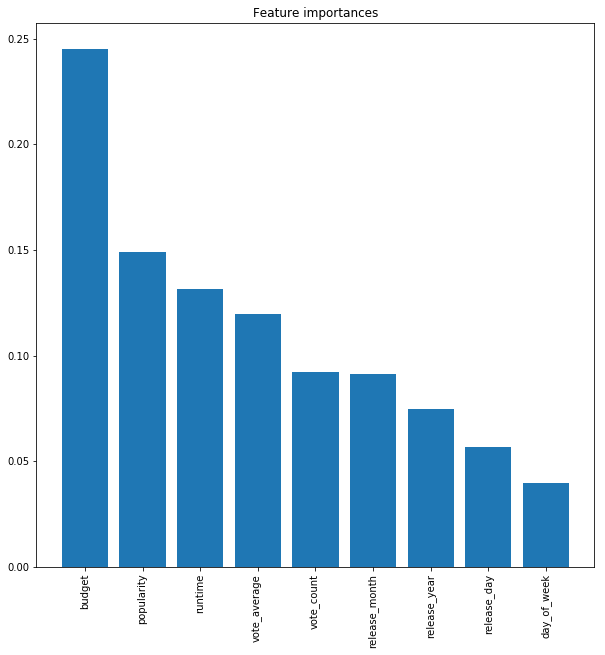

In [12]:
plt.figure(figsize=(10,10))
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), X.columns, rotation='vertical')
plt.title("Feature importances")
plt.show()